In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from an Excel file
data = pd.read_excel('/content/22ETAI410022.xlsx')

In [5]:
# Check for duplicate elements
if data.duplicated().any():
    print(f"Dataset contains {data.duplicated().sum()} duplicate rows.")
    data = data.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [6]:
# Check for missing values
if data.isnull().any(axis=0).any():
    print("Dataset contains missing values.")
    print(data.isnull().sum())
else:
    print("No missing values found.")

No missing values found.


In [7]:
# Check for outliers using the interquartile range (IQR) method
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
outliers_found = False  # Flag to track if any outliers are detected

for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not outliers.empty:
        outliers_found = True
        print(f"Outliers detected in column '{col}':")
        print(outliers[col])

if not outliers_found:
    print("No outliers found in any column.")

No outliers found in any column.


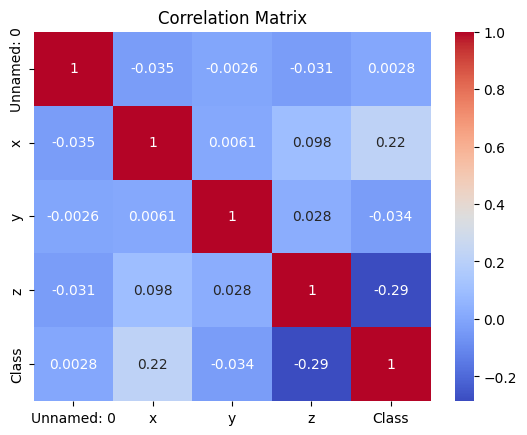

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### **No multicollinearity, None of the features (x, y, z) are highly correlated with each other, so multicollinearity is not a concern here.**

In [9]:
# Split the data into features (X) and target (y)
X = data[['x', 'y', 'z']]
y = data['Class']

In [10]:
X.head()

,x,y,z
0,62.475245,20.363556,25.727615
1,23.727534,45.566572,-17.455676
2,21.878237,17.140578,-19.073632
3,58.699649,30.642525,34.977104
4,59.303132,18.864182,33.731118


In [11]:
y.head()

,Class
0,1
1,0
2,0
3,1
4,1


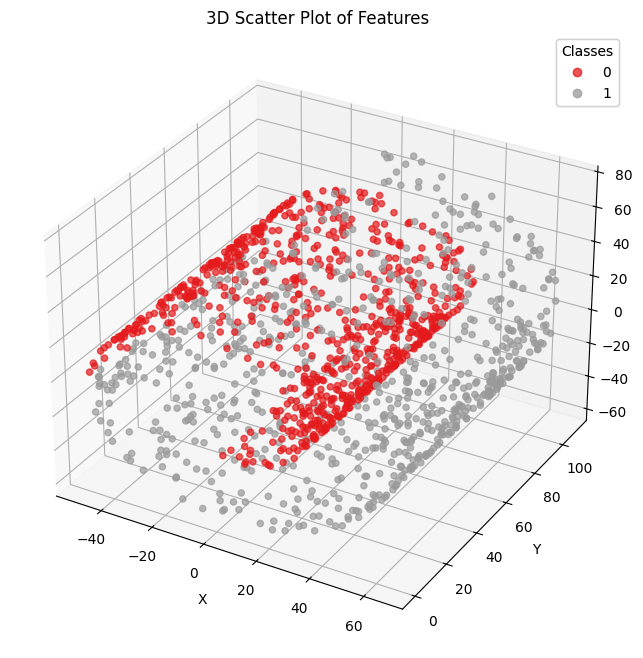

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X['x'], X['y'], X['z'], c=y, cmap='Set1', alpha=0.7)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Features')

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

### Class 0 (red) dominates certain areas, while class 1 (gray) is dispersed but overlaps significantly.

In [13]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.head()

,x,y,z
382,21.664208,61.743253,-19.243628
538,13.261767,54.237513,-23.777823
1493,65.104639,73.481417,14.293426
1112,-13.011533,101.083470,-54.587747
324,11.755605,77.518466,37.578337


In [15]:
X_val.head()

,x,y,z
1116,-30.540512,61.363384,32.858839
1368,24.272597,10.592368,-16.922439
422,-13.607063,91.306187,-54.382238
413,29.401213,55.717299,20.712551
451,-38.097908,67.346186,-37.091827


In [16]:
y_train.head()

,Class
382,0
538,0
1493,1
1112,1
324,0


In [17]:
y_val.head()

,Class
1116,0
1368,0
422,1
413,0
451,1


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [19]:
# Train Polynomial Kernel SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVM model with polynomial kernel
svm_model = SVC(kernel='poly')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)

# Best parameters and model
best_svm_model = grid_search_svm.best_estimator_
print("Best SVM parameters:", grid_search_svm.best_params_)

Best SVM parameters: {'C': 10, 'degree': 4, 'gamma': 'scale'}


In [20]:
# Train Multi-Layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier

# Define the MLP model
mlp_model = MLPClassifier(max_iter=2000)

# Hyperparameter tuning using GridSearchCV
param_grid_mlp = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train, y_train)

# Best parameters and model
best_mlp_model = grid_search_mlp.best_estimator_
print("Best MLP parameters:", grid_search_mlp.best_params_)

Best MLP parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10)}


In [21]:
# Evaluate SVM
from sklearn.metrics import classification_report, confusion_matrix

y_pred_svm = best_svm_model.predict(X_val)
print("SVM Classification Report:\n", classification_report(y_val, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       150
           1       0.97      0.81      0.88       150

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300

SVM Confusion Matrix:
 [[146   4]
 [ 28 122]]


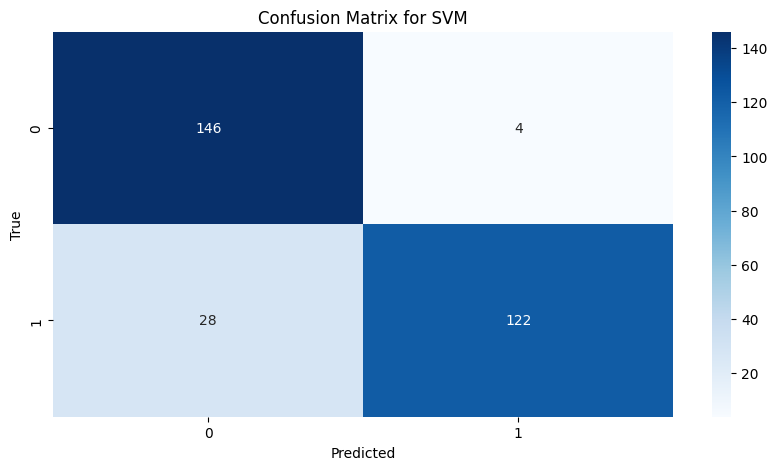

In [22]:
# Confusion Matrix for SVM
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_val, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
# Evaluate MLP
y_pred_mlp = best_mlp_model.predict(X_val)
print("MLP Classification Report:\n", classification_report(y_val, y_pred_mlp))
print("MLP Confusion Matrix:\n", confusion_matrix(y_val, y_pred_mlp))

MLP Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       0.99      1.00      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

MLP Confusion Matrix:
 [[148   2]
 [  0 150]]


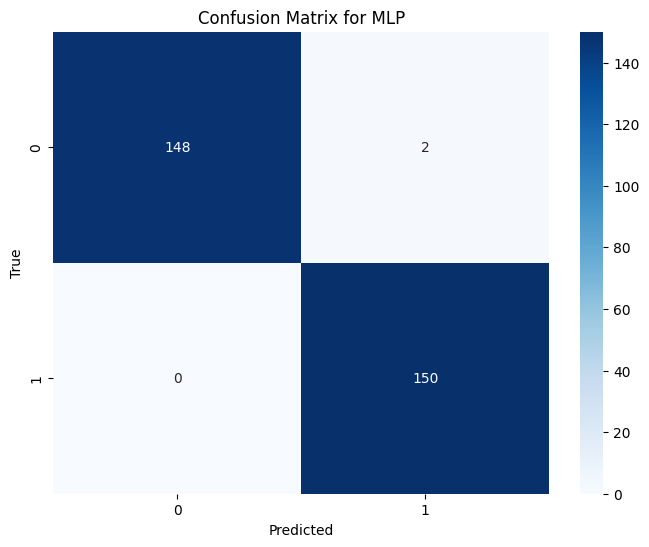

In [24]:
# Confusion Matrix for MLP
plt.figure(figsize=(8, 6))
y_pred = best_mlp_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_mlp_model.classes_, yticklabels=best_mlp_model.classes_)
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()